In [1]:
from numbers import Number
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import onix.models.hyperfine as hyperfine
from IPython.display import display

%matplotlib ipympl

In [2]:
B_field = 200e-4
print(f"B field is set to {B_field / 1e-4:.1f} G")

ground = hyperfine.states["7F0"]
ground._Hamiltonian = ground.H_total(B_field)
excited = hyperfine.states["5D0"]
excited._Hamiltonian = excited.H_total(B_field)

B field is set to 200.0 G


## Zeeman splittings

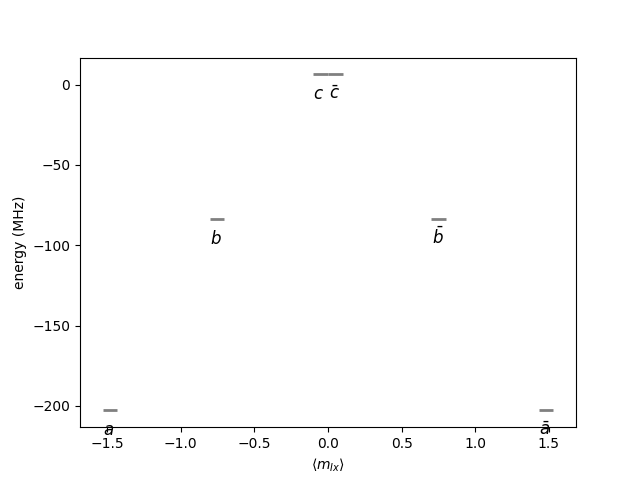

In [4]:
energies_g, states_g = ground.energies_and_eigenstates()

fig, ax = plt.subplots()
ax.set_xlabel(r"$\langle m_{Ix} \rangle$")
ax.set_ylabel("energy (MHz)")

for kk, label in enumerate(hyperfine.state_labels["7F0"]):
    m_Ig = ground.m_Ix(states_g[kk])
    ax.errorbar(
        m_Ig, energies_g[kk],
        color="gray", fmt='.', markersize=0,
        xerr=0.05, capsize=0, elinewidth=2,
    )
    if "'" in label:
        state_text = "$\\bar{" + label[0] + "}$"
    else:
        state_text = f"${label[0]}$"
    ax.annotate(
        state_text,
        xy=(m_Ig, energies_g[kk]), xycoords="data", xytext=(-5, -18),
        textcoords="offset points", color="k", size=12,
    )

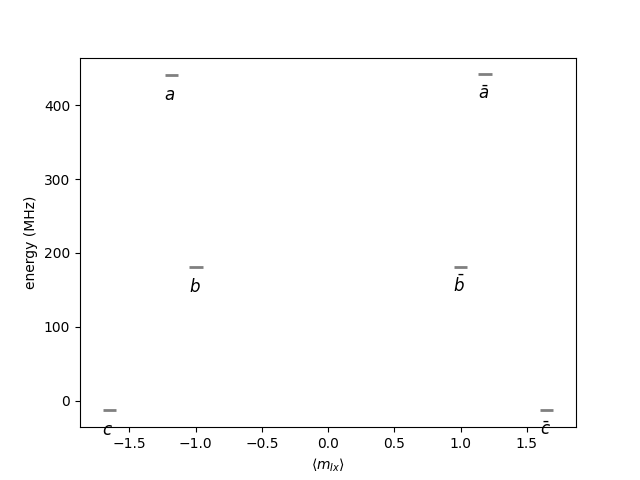

In [6]:
energies_e, states_e = excited.energies_and_eigenstates()

fig, ax = plt.subplots()
ax.set_xlabel(r"$\langle m_{Ix} \rangle$")
ax.set_ylabel("energy (MHz)")

for kk, label in enumerate(hyperfine.state_labels["5D0"]):
    m_Ie = excited.m_Ix(states_e[kk])
    ax.errorbar(
        m_Ie, energies_e[kk],
        color="gray", fmt='.', markersize=0,
        xerr=0.05, capsize=0, elinewidth=2,
    )
    if "'" in label:
        state_text = "$\\bar{" + label[0] + "}$"
    else:
        state_text = f"${label[0]}$"
    ax.annotate(
        state_text,
        xy=(m_Ie, energies_e[kk]), xycoords="data", xytext=(-5, -18),
        textcoords="offset points", color="k", size=12,
    )

### Optical hyperfine probabilities

In [5]:
df = pd.DataFrame(hyperfine.get_optical_hyperfine_probabilities(B_field))
pd.options.display.float_format = "{:.3f}".format
display(df)

,a,a',b,b',c,c'
c,0.856,0.014,0.111,0.004,0.005,0.011
c',0.014,0.856,0.004,0.110,0.011,0.005
b,0.032,0.067,0.396,0.320,0.149,0.036
b',0.067,0.031,0.320,0.396,0.036,0.150
a,0.001,0.031,0.040,0.129,0.322,0.478
a',0.031,0.001,0.129,0.041,0.477,0.321


### Ground M1 matrix elements

In [11]:
M1_elements = ground.m1_elements()
table = {}
for kk, polarization in enumerate(["σ+", "σ-", "π"]):
    for g_state in ground.states:
        table[g_state] = {}
        for g_state_1 in ground.states:
            MHz_per_T_to_kHz_per_G = 1e6 / (1e3 / 1e-4)
            table[g_state][g_state_1] = abs(M1_elements[kk][g_state][g_state_1] * MHz_per_T_to_kHz_per_G)
    print(f"Polarization: {polarization}. Unit: 2π kHz/G.")
    df = pd.DataFrame(table)
    pd.options.display.float_format = "{:.3f}".format
    display(df)
    #print_table(table, ndecimals=3)
    print()

Polarization: σ+. Unit: 2π kHz/G.


,a,a',b,b',c,c'
a,0.480,0.014,0.227,0.080,0.048,0.039
a',0.014,0.480,0.036,0.086,0.025,0.031
b,0.086,0.080,0.241,0.146,0.212,0.176
b',0.036,0.227,0.146,0.241,0.117,0.122
c,0.031,0.039,0.122,0.176,0.063,0.240
c',0.025,0.048,0.116,0.212,0.240,0.063



Polarization: σ-. Unit: 2π kHz/G.


,a,a',b,b',c,c'
a,0.480,0.014,0.086,0.036,0.031,0.025
a',0.014,0.480,0.080,0.227,0.039,0.048
b,0.227,0.036,0.241,0.146,0.122,0.116
b',0.080,0.086,0.146,0.241,0.176,0.212
c,0.048,0.025,0.212,0.117,0.063,0.240
c',0.039,0.031,0.176,0.122,0.240,0.063



Polarization: π. Unit: 2π kHz/G.


,a,a',b,b',c,c'
a,0.151,0.033,0.442,0.112,0.046,0.090
a',0.033,0.151,0.112,0.442,0.090,0.046
b,0.442,0.112,0.168,0.379,0.370,0.174
b',0.112,0.442,0.379,0.167,0.175,0.370
c,0.046,0.090,0.370,0.175,0.141,0.885
c',0.090,0.046,0.174,0.370,0.885,0.142


## Schiff moment sensitivities

These numbers are likely incorrect. Double check the calculations in the `hyperfine` module.

In [11]:
table = [["Properties"] + ground.states]
energies, eigenstates = ground.energies_and_eigenstates()
row = ["Schiff sensitivity D1"]
for eigenstate in eigenstates:
    row.append(ground.Schiff_moment_sensitivity(eigenstate)[0])
table.append(row)
row = ["Schiff sensitivity D2"]
for eigenstate in eigenstates:
    row.append(ground.Schiff_moment_sensitivity(eigenstate)[1])
table.append(row)
print("7F0 Schiff moment sensitivities:")
print_table(table, ndecimals=3, first_column_size=24)
print()

7F0 Schiff moment sensitivities:
              Properties       a      a'       b      b'       c      c'
   Schiff sensitivity D1  -1.766   1.766  -0.639   0.639   0.069  -0.070
   Schiff sensitivity D2  -0.680   0.678  -0.604   0.603  -0.155   0.157

